### STL 베스트 레깅스 판매 제품 후기 크롤링과 워드클라우드

In [5]:
import sys # 시스템
import os  # 시스템

import pandas as pd  # 판다스 : 데이터분석 라이브러리
import numpy as np   # 넘파이 : 숫자, 행렬 데이터 라이브러리

from bs4 import BeautifulSoup    # html 데이터를 전처리
from selenium import webdriver   # 웹 브라우저 자동화
import time    # 서버와 통신할 때 중간중간 시간 지연
from PIL import Image
import PIL.Image as pilimg
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
#Step 1. 크롬 웹브라우저 실행
path = "chromedriver.exe"       # 윈도우는 "chromedriver.exe"

driver = webdriver.Chrome(path)
# 사이트 주소는 네이버
driver.get('http://www.beststl.com/shop/shopdetail.html?branduid=86549&xcode=059&mcode=001&scode=001&type=Y&sort=manual&cur_code=059001001&GfDT=a253UQ%3D%3D')
time.sleep(2)  # 2초간 정지

In [3]:
for e in range(1,11):
    size = []
    driver.find_element_by_link_text(str(e)).click()
    time.sleep(2) # 지연을 해줘야 함
    for i in range(0,5):
        size.append(driver.find_elements_by_css_selector(".content")[i].text)
        globals()[('size_r{}'.format(e))] = size
    print('size_r{}'.format(e))

size_r1
size_r2
size_r3
size_r4
size_r5
size_r6
size_r7
size_r8
size_r9
size_r10


In [4]:
size_r1

['제체형과 비슷한분도 계실것같아 도움이 될까해서 민망함에도 불구하고 사진 올려요\n저는 마른비만이에요\n하체는 부실하고 젓가락다리에 엉덩이는 납작해요\n그나마 골반이 옆으로 나와줘서 앞...▼ 더보기',
 '모든 살이 배에만 있는 심한 복부비만입니다. 팔다리는 얇은 편인데 병원에서도 복부가 너무 심하다고 운동을 꼭 하라고 해서 홈트 시작한지 일주일째에요.\n\n출산으로 늘어진 살+막먹어서 찌운살\n...▼ 더보기',
 '사진이 매우 신랄하니 노약자 임산부 심약자는 보지마세요 ㅋㅋ\n\n11월에 출산하고 아직 몸이 성치않은(?) 애기엄마에요 ㅠㅠ\n출산후에 몸이 늘어져서 탄력이라곤 눈씻고 찾아봐도 찾을수 없는 ...▼ 더보기',
 '160cm / 64kg\n\n리뷰 보면 항상 마르고 몸매 예쁜 구매자들의 리뷰만 보여서 구매 전 항상 고민을 많이 했었어요\n근데 이 제품은 저와 비슷한 체형의 구매자분들께서 용기내 올린 후기 보고 바로 ...▼ 더보기',
 '참나 어이가 없네요. 입어보니 라인이 사기치는것처럼 잘나와서 운동 열심히 안해도 되겠는데? 라며 착각하게 만드는 레깅스네요.ㅡㅡ 근데도 몸 압박하는건 없이 편안하고 뭐 이런경우가 다있죠? 161 54입니다 짧은...▼ 더보기']

In [10]:
# 각 리뷰데이터 띄어쓰기로 구분하고 합치기
size_review = size_r1+size_r2+size_r3+size_r4+size_r5+size_r6+size_r7+size_r8+size_r9+size_r10
size_review_j = " ".join(size_review)
size_review_j

'제체형과 비슷한분도 계실것같아 도움이 될까해서 민망함에도 불구하고 사진 올려요\n저는 마른비만이에요\n하체는 부실하고 젓가락다리에 엉덩이는 납작해요\n그나마 골반이 옆으로 나와줘서 앞...▼ 더보기 모든 살이 배에만 있는 심한 복부비만입니다. 팔다리는 얇은 편인데 병원에서도 복부가 너무 심하다고 운동을 꼭 하라고 해서 홈트 시작한지 일주일째에요.\n\n출산으로 늘어진 살+막먹어서 찌운살\n...▼ 더보기 사진이 매우 신랄하니 노약자 임산부 심약자는 보지마세요 ㅋㅋ\n\n11월에 출산하고 아직 몸이 성치않은(?) 애기엄마에요 ㅠㅠ\n출산후에 몸이 늘어져서 탄력이라곤 눈씻고 찾아봐도 찾을수 없는 ...▼ 더보기 160cm / 64kg\n\n리뷰 보면 항상 마르고 몸매 예쁜 구매자들의 리뷰만 보여서 구매 전 항상 고민을 많이 했었어요\n근데 이 제품은 저와 비슷한 체형의 구매자분들께서 용기내 올린 후기 보고 바로 ...▼ 더보기 참나 어이가 없네요. 입어보니 라인이 사기치는것처럼 잘나와서 운동 열심히 안해도 되겠는데? 라며 착각하게 만드는 레깅스네요.ㅡㅡ 근데도 몸 압박하는건 없이 편안하고 뭐 이런경우가 다있죠? 161 54입니다 짧은...▼ 더보기 진심 STL 가성비 쌉에바에여 사진 두장 다 상의 하의 다 여기서 산 건데 진심 .. 다 맘에 들어여 평범한 사람을 몸짱처럼 보이게 해주는 ㅠ ㅠ 이 가격에 이 핏 다른데선 상상도 할 수 없ㅅ음 진짜 너무 예뻐여 저 ...▼ 더보기 진짜 커버갑중에 갑\n모델이라서 몸매가 좋아보이겟거니 커버 잘되겟거니 햇는데\n그게 저한테도 가능해서 놀랐습니당 ㅠㅠ\n최애 레깅스 !! 하비중에 하비\n어떤옷을 입어도 테 안나는 스타일이죠\n후기 엄청보고 구매했어요. 어느분의 말을듣고 그분말을 반신반의하며 샀는데\n와 진짜 좋네요!! 재구매 100프로의사 확실!!...▼ 더보기 뱃살을 딱 잡아주고 몸에 편하게 붙어서 운동할때 엄청 편했어요~\n신축성도 있고 두께도 딱 적당한게 이거 입고 그냥 일상생활해도 될 정도로 편했고요,\n색상은 마

In [27]:
mask = np.array(Image.open('yoga.png'))
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

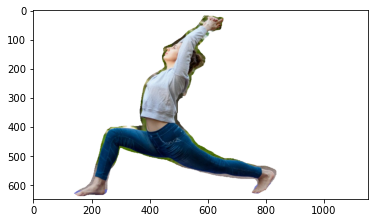

In [28]:
plt.imshow(mask)

In [39]:
stopwords = {'더보기','너무', '진짜','레깅스','이'}

In [40]:
wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               background_color="white",
               stopwords = stopwords,
               max_words=20000,
               mask=mask,
               max_font_size=300).generate(size_review_j)
wc.words_

{'딱': 1.0,
 '엄청': 0.8571428571428571,
 '몸무게': 0.8571428571428571,
 '키': 0.8571428571428571,
 '좋아요': 0.8571428571428571,
 '다': 0.7142857142857143,
 '와': 0.7142857142857143,
 '입고': 0.7142857142857143,
 '사이즈': 0.7142857142857143,
 '잘': 0.7142857142857143,
 '항상': 0.5714285714285714,
 '후기': 0.5714285714285714,
 '짧은': 0.5714285714285714,
 '맘에': 0.5714285714285714,
 'ㅠ': 0.5714285714285714,
 '넘': 0.5714285714285714,
 '완전': 0.5714285714285714,
 '왜': 0.5714285714285714,
 '저도': 0.5714285714285714,
 '길이도': 0.5714285714285714,
 '사진': 0.42857142857142855,
 '살이': 0.42857142857142855,
 'ㅋㅋ': 0.42857142857142855,
 'ㅠㅠ': 0.42857142857142855,
 '리뷰': 0.42857142857142855,
 '많이': 0.42857142857142855,
 '진심': 0.42857142857142855,
 'STL': 0.42857142857142855,
 '그냥': 0.42857142857142855,
 '가격이': 0.42857142857142855,
 '더': 0.42857142857142855,
 '정말': 0.42857142857142855,
 '사서': 0.42857142857142855,
 '대박': 0.42857142857142855,
 '안': 0.42857142857142855,
 '제': 0.42857142857142855,
 '올립니다': 0.42857142857142855,
 '

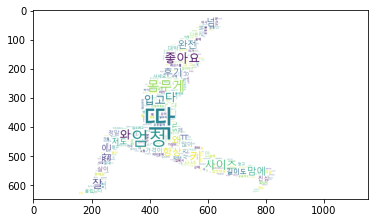

In [41]:
plt.imshow(wc)

In [44]:
# 파일로 저장
wc.to_file('wordcloud_윤소빈.png')